In [1]:
import pandas as pd

ita_08 = pd.read_csv("/Volumes/HDD_Ale/Progetto_DSLAB/ste_reg_8_12_20/scandinavia8mattina.csv")
ita_08

,Unnamed: 0,TSTOT.PrezzoScandi,TSTOT.ConsumiScandi,TSTOT.GradiScandi,TSTOT.ConsumipercScandi,TSTOT.PrezzopercScandi,TSTOT.BankHolidayScandi,TSTOT.EndYearScandi,TSTOT.DayOfWeekScandi,TSTOT.DayOffScandi,lunedi,martedi,mercoledi,giovedi,venerdi,sabato,domenica
0,0,34.65,33043.6,-4.0,2.478888,8.213616,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,34.65,40963.3,5.0,12.669327,8.213616,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,33.37,41785.9,3.0,9.208779,3.472868,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,31.95,41644.2,4.0,14.093073,11.987382,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,33.66,42628.0,-1.0,12.122886,9.964064,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,5.77,33336.4,4.0,0.047118,-9.702660,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1456,1456,10.71,37588.2,4.0,-0.340698,-0.279330,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,1457,15.28,41050.6,0.0,0.145154,0.791557,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1458,1458,14.36,40440.5,4.0,-1.410322,-3.494624,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [2]:
ita_08 = ita_08.drop(ita_08.columns[[0]], axis=1)
del ita_08["TSTOT.ConsumipercScandi"]
del ita_08["TSTOT.PrezzopercScandi"]
del ita_08["TSTOT.DayOfWeekScandi"]
ita_08.columns = ["Prezzo","Consumo","Gradi","BankH","EndYear","DayOff","lunedi","martedi","mercoledi","giovedi","venerdi","sabato","domenica"]
ita_08.Gradi = ita_08.Gradi.shift(1)
ita_08.Prezzo = ita_08.Prezzo.shift(1)
ita_08["Giorno"] = ["lun" if lu==1 else "mar" if ma==1 else "mer" if me==1 else "gio" if gi==1 else "ven" if ve==1 else "sab" if sa==1 else "dom" for lu,ma,me,gi,ve,sa,do in zip(ita_08["lunedi"],ita_08["martedi"],ita_08["mercoledi"],ita_08["giovedi"],ita_08["venerdi"],ita_08["sabato"],ita_08["domenica"])]

del ita_08["lunedi"]
del ita_08["martedi"]
del ita_08["mercoledi"]
del ita_08["giovedi"]
del ita_08["venerdi"]
del ita_08["sabato"]
del ita_08["domenica"]
ita_08 = ita_08.dropna()

In [3]:
ita_08

,Prezzo,Consumo,Gradi,BankH,EndYear,DayOff,Giorno
1,34.65,40963.3,-4.0,0.0,1.0,0.0,lun
2,34.65,41785.9,5.0,0.0,1.0,0.0,mar
3,33.37,41644.2,3.0,0.0,1.0,0.0,mer
4,31.95,42628.0,4.0,0.0,1.0,0.0,gio
5,33.66,39273.6,-1.0,1.0,0.0,0.0,ven
...,...,...,...,...,...,...,...
1455,1.27,33336.4,4.0,0.0,0.0,0.0,dom
1456,5.77,37588.2,4.0,0.0,0.0,0.0,lun
1457,10.71,41050.6,4.0,0.0,1.0,0.0,mar
1458,15.28,40440.5,0.0,0.0,1.0,0.0,mer


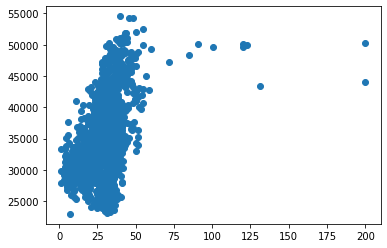

In [4]:
import matplotlib.pyplot as plt

plt.scatter(ita_08["Prezzo"], ita_08["Consumo"])
plt.show()

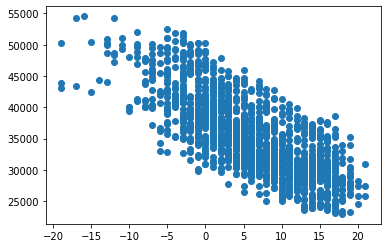

In [5]:
plt.scatter(ita_08["Gradi"], ita_08["Consumo"])
plt.show()

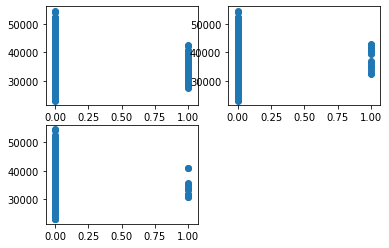

In [6]:
plt.subplot(221)
plt.scatter(ita_08["BankH"], ita_08["Consumo"])
plt.subplot(222)
plt.scatter(ita_08["EndYear"], ita_08["Consumo"])
plt.subplot(223)
plt.scatter(ita_08["DayOff"], ita_08["Consumo"])

plt.show()

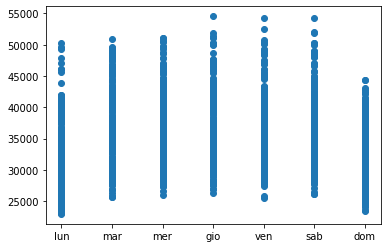

In [7]:
plt.scatter(ita_08["Giorno"], ita_08["Consumo"])
plt.show()

In [8]:
#ita_08["Gradi2"] = ita_08["Gradi"]**2

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

def preprocess_scale(X, scaler=None):
    if not scaler:  
        scaler = StandardScaler()
        scaler.fit(X)
    X = scaler.transform(X)
    return X, scaler

def preprocess_OneHot(X,encoder=None):
    if not encoder:
        encoder = OneHotEncoder(handle_unknown='ignore')
        encoder.fit(X)
    X = encoder.transform(X).toarray()
    return X, encoder

def preprocessing(X, OH_encoder=None, scaler=None):
    X_categorical = X["Giorno"].to_numpy().reshape(-1, 1)
    X_numeric = X[["Prezzo","Gradi","BankH","EndYear","DayOff"]] 
    X_categorical, OH_encoder = preprocess_OneHot(X_categorical, OH_encoder)
    X_numeric, scaler = preprocess_scale(X_numeric, scaler)
    
    dim_X_cat = X_categorical.shape[1]
    dim_X_num = X_numeric.shape[1]
    X = np.ndarray(shape=(X.shape[0],dim_X_cat+dim_X_num))

    X[:,0:dim_X_num] = X_numeric
    X[:,dim_X_num:dim_X_num+dim_X_cat] = X_categorical
    return X, OH_encoder, scaler

def metrics(X_test,y_test,regressor):
    #R2
    R2 = regressor.score(X=X_test,y=y_test.ravel())
    y_pred = regressor.predict(X_test)
    #RMSE
    RMSE = mean_squared_error(y_test, y_pred,squared=False)
    #MAE
    MAE = mean_absolute_error(y_test, y_pred)
    return R2,RMSE,MAE

def print_result(R2,RMSE,MAE,reg):
    print("R2 = %.2f" % R2)
    print("RMSE = %.2f" % RMSE)
    print("MAE = %.2f" % MAE)
    if hasattr(reg, 'coef_'):
        print()
        print("Coeff:")
        print(reg.coef_)
    if hasattr(reg, 'intercept_'):
        print()
        print("Intercept:")
        print(reg.intercept_)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(ita_08[["Prezzo","Gradi","BankH","EndYear","DayOff","Giorno"]], ita_08["Consumo"], test_size=0.2, random_state=42)

In [11]:
X_train, OH_encoder, scaler = preprocessing(X_train)
y_train, scaler_y = preprocess_scale(y_train.to_numpy().reshape(-1, 1))

X_test,_,_ = preprocessing(X_test,OH_encoder,scaler)
y_test,_ = preprocess_scale(y_test.to_numpy().reshape(-1, 1), scaler_y)

In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train.ravel())
R2,RMSE,MAE = metrics(X_test,y_test,reg)

print_result(R2,RMSE,MAE,reg)

R2 = 0.72
RMSE = 0.56
MAE = 0.45

Coeff:
[ 0.1210112  -0.70962238 -0.12651796  0.00901137 -0.03889837 -0.44021787
  0.22755165 -0.60732132  0.19412127  0.16462796  0.21234715  0.24889116]

Intercept:
0.005250417083723939


In [27]:
reg1 = LinearRegression()
reg1.fit(X_train, y_train.ravel())
prediction = reg1.predict(X_test)

In [29]:
prediction

array([-9.16582496e-01,  2.63184739e-01,  8.86052075e-01, -5.87296100e-01,
       -4.01016044e-01, -1.13549795e+00, -9.70108363e-01, -8.77047669e-01,
       -7.19654110e-01, -1.44986353e+00, -9.96477156e-01, -8.78086365e-01,
        4.93966885e-01, -9.66121377e-01,  1.55951518e+00,  1.27183082e-01,
       -5.44535408e-01,  1.54168830e+00,  2.87246516e-01,  9.76173475e-01,
       -1.48997399e-01,  8.45802557e-01,  4.68304007e-01,  8.89580482e-01,
       -6.15753263e-01,  7.70713257e-02,  1.03919521e+00, -1.09130707e-01,
        6.04689597e-01,  8.27320387e-01, -7.76130047e-01, -7.80610458e-01,
        3.14255529e-02, -4.01605171e-01, -5.87690951e-01, -1.44143337e-01,
       -7.06609408e-01,  1.06230572e+00,  1.09311976e+00, -4.78169196e-01,
        6.62806650e-01, -1.52149062e+00,  3.03574477e-01, -1.06812404e+00,
       -3.39992718e-01,  9.96621373e-01, -7.02476894e-01, -1.63950682e-01,
       -3.78501479e-01, -1.18388411e+00, -5.57995950e-01,  1.24434312e+00,
        7.45048887e-02, -

In [28]:
y_test

array([[-1.11199938e+00],
       [ 1.75551784e-01],
       [ 2.02668026e+00],
       [-5.41529392e-01],
       [-6.14445754e-01],
       [-1.48400906e+00],
       [-2.86532958e-01],
       [-4.43150687e-01],
       [-8.36243835e-01],
       [-1.09519747e+00],
       [-1.22484458e+00],
       [-1.08358535e+00],
       [ 6.31392576e-01],
       [-1.04320240e+00],
       [ 9.45390284e-01],
       [-5.10504258e-01],
       [ 2.63096830e-01],
       [ 8.33372198e-01],
       [ 1.07970819e+00],
       [ 1.49660944e+00],
       [-1.88640795e-01],
       [ 3.33175033e-01],
       [-2.46993346e-01],
       [ 7.31474176e-01],
       [-3.46069427e-01],
       [ 3.02782404e-01],
       [ 1.97372832e+00],
       [ 9.92503726e-01],
       [ 6.70040195e-01],
       [ 3.86418899e-01],
       [-6.82021208e-03],
       [-7.74550365e-01],
       [ 2.05457873e-01],
       [-7.23593245e-01],
       [-9.13798561e-01],
       [-1.58085985e-01],
       [-1.12134097e+00],
       [ 1.65288659e+00],
       [ 2.6

In [42]:
y_new_inverse = .inverse_transform(prediction)

AttributeError: 'SVR' object has no attribute 'inverse_transform'

In [19]:
from sklearn.svm import SVR
#Kernel Lineare
reg = SVR(kernel='linear')
reg.fit(X_train,y_train.ravel())
R2,RMSE,MAE = metrics(X_test,y_test,reg)

print_result(R2,RMSE,MAE,reg)

R2 = 0.70
RMSE = 0.57
MAE = 0.45

Coeff:
[[ 0.12676791 -0.72846647 -0.11272966  0.04091718 -0.03338273 -0.38629147
   0.18307988 -0.59504806  0.24344398  0.15626974  0.19083572  0.20771022]]

Intercept:
[-0.04814768]


In [20]:
predict = reg.predict(X_test)
predict

array([-9.40233734e-01,  2.65969546e-01,  8.94486731e-01, -6.17649163e-01,
       -4.46436810e-01, -1.15906989e+00, -1.07267323e+00, -1.01639111e+00,
       -8.16600525e-01, -1.47358430e+00, -1.13310728e+00, -8.99906274e-01,
        4.18344278e-01, -1.00802130e+00,  1.52692018e+00,  1.34297321e-01,
       -5.78971932e-01,  1.47123701e+00,  2.61975419e-01,  9.15095489e-01,
       -1.48725455e-01,  8.76609296e-01,  3.93559270e-01,  8.24383116e-01,
       -7.42489493e-01, -7.89024349e-03,  9.57431633e-01, -1.98752837e-01,
        5.90322428e-01,  7.74584490e-01, -9.08573963e-01, -8.74160577e-01,
        3.60831368e-02, -4.44955264e-01, -7.15367885e-01, -2.22106486e-01,
       -8.18358555e-01,  9.83917230e-01,  1.03340771e+00, -5.09448563e-01,
        6.08540641e-01, -1.59502995e+00,  3.43013256e-01, -1.11277771e+00,
       -3.80411799e-01,  9.49840723e-01, -7.15942751e-01, -2.00192530e-01,
       -4.96049923e-01, -1.24765900e+00, -6.86181960e-01,  1.16831837e+00,
        6.11224062e-02, -

In [21]:
y_test

array([[-1.11199938e+00],
       [ 1.75551784e-01],
       [ 2.02668026e+00],
       [-5.41529392e-01],
       [-6.14445754e-01],
       [-1.48400906e+00],
       [-2.86532958e-01],
       [-4.43150687e-01],
       [-8.36243835e-01],
       [-1.09519747e+00],
       [-1.22484458e+00],
       [-1.08358535e+00],
       [ 6.31392576e-01],
       [-1.04320240e+00],
       [ 9.45390284e-01],
       [-5.10504258e-01],
       [ 2.63096830e-01],
       [ 8.33372198e-01],
       [ 1.07970819e+00],
       [ 1.49660944e+00],
       [-1.88640795e-01],
       [ 3.33175033e-01],
       [-2.46993346e-01],
       [ 7.31474176e-01],
       [-3.46069427e-01],
       [ 3.02782404e-01],
       [ 1.97372832e+00],
       [ 9.92503726e-01],
       [ 6.70040195e-01],
       [ 3.86418899e-01],
       [-6.82021208e-03],
       [-7.74550365e-01],
       [ 2.05457873e-01],
       [-7.23593245e-01],
       [-9.13798561e-01],
       [-1.58085985e-01],
       [-1.12134097e+00],
       [ 1.65288659e+00],
       [ 2.6

In [36]:
#Kernel Polinomiale
reg = SVR(kernel='poly')
reg.fit(X_train,y_train.ravel())
R2,RMSE,MAE = metrics(X_test,y_test,reg)

print_result(R2,RMSE,MAE,reg)

R2 = 0.45
RMSE = 0.78
MAE = 0.53

Intercept:
[-0.03792918]


In [37]:
#Kernel Gaussiano
reg = SVR(kernel='rbf')
reg.fit(X_train,y_train.ravel())
R2,RMSE,MAE = metrics(X_test,y_test,reg)

print_result(R2,RMSE,MAE,reg)

R2 = 0.75
RMSE = 0.53
MAE = 0.41

Intercept:
[0.50064392]


In [38]:
##Random Forest
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 2, random_state = 42)
reg.fit(X_train, y_train.ravel())
R2,RMSE,MAE = metrics(X_test,y_test,reg)

print_result(R2,RMSE,MAE,reg)

R2 = 0.63
RMSE = 0.64
MAE = 0.50


In [39]:
##Random Forest
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 100, random_state = 42)
reg.fit(X_train, y_train.ravel())
R2,RMSE,MAE = metrics(X_test,y_test,reg)

print_result(R2,RMSE,MAE,reg)

R2 = 0.74
RMSE = 0.54
MAE = 0.42


In [40]:
##Random Forest
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 1000, random_state = 42)
reg.fit(X_train, y_train.ravel())
R2,RMSE,MAE = metrics(X_test,y_test,reg)

print_result(R2,RMSE,MAE,reg)

R2 = 0.73
RMSE = 0.54
MAE = 0.43


In [41]:
import xgboost as xgb
reg = xgb.XGBRegressor(n_estimators=100,reg_lambda=2,gamma=0.1,max_depth=3)
reg.fit(X_train, y_train)
R2,RMSE,MAE = metrics(X_test,y_test,reg)

print_result(R2,RMSE,MAE,reg)

R2 = 0.74
RMSE = 0.53
MAE = 0.42


In [43]:
pd.DataFrame(reg.feature_importances_.reshape(1, -1), columns=["Prezzo","Gradi","BankH","EndYear","DayOff","G1","G2","G3","G4","G5","G6","G7"])

,Prezzo,Gradi,BankH,EndYear,DayOff,G1,G2,G3,G4,G5,G6,G7
0,0.045659,0.464086,0.053815,0.024411,0.00719,0.150738,0.016366,0.186715,0.015864,0.007969,0.01558,0.011608
